#Q? How are the number of properties distributed according to their surface?

In [8]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px

In [3]:
# Get the current directory (analyses folder)
current_dir = os.getcwd()
# Navigate up one directory to reach the parent directory (which contains the data folder)
parent_dir = os.path.dirname(current_dir)

# Define the file paths relative to the parent directory using os.path.join
clean_huis_te_koop_path = os.path.join(parent_dir, "data", "cleaned", "clean_house.csv")
clean_apartement_te_koop_path = os.path.join(parent_dir, "data", "cleaned", "clean_app.csv")

house = pd.read_csv(clean_huis_te_koop_path, sep=",")
app = pd.read_csv(clean_apartement_te_koop_path, sep=",")

#What variables are most subject to outliers?

In [61]:
app.head(10)
app.columns

quantitative = ['price', 'number_of_rooms', 'living_area', 'terrace_area', 'garden_area', 'surface_of_good','number_of_facades']


# fig = px.bar(house, x="property_subtype")
# fig = px.histogram(house, x="number_of_rooms", orientation="v")
# fig = px.box(house, y="number_of_rooms", hover_data=["property_id"])
# fig = px.box(house, y="living_area", hover_data=["property_id"])

## interesting ones, box plot with colors per subtype resulting in multiple boxplots next to each other
# fig = px.box(house, color="property_subtype", y="price", hover_data=["property_id"])
# fig = px.box(house, color="property_subtype", y="number_of_rooms", hover_data=["property_id"])
# fig = px.box(house, color="property_subtype", y="number_of_facades", hover_data=["property_id"])

fig = px.box(app, color="property_subtype", y="price", hover_data=["property_id"])

fig.show()


In [82]:
def count_iqr_outliers (df, column_name):
    """
    Counts outliers based on interquartile range
    """
    seventy_fifth = df[column_name].quantile(0.75)
    twenty_fifth = df[column_name].quantile(0.25)
    iqr = seventy_fifth-twenty_fifth
    upper = seventy_fifth + (1.5*iqr)
    lower = twenty_fifth - (1.5*iqr)
    outliers = df.loc[(df[column_name] >= upper)|(df[column_name] <= lower)]
    #print(outliers)
    count_outliers = outliers.shape[0]
    return count_outliers

print(count_iqr_outliers(app, "price"))


#d = {'col1': [1, 2], 'col2': [3, 4]}
#df = pd.DataFrame(data=d)
d={}
for col in quantitative:
    d[col] = [count_iqr_outliers(app, col)]

df = pd.DataFrame(data=d)
df= df.transpose()
df.rename(columns={0: "outliers_count"}, inplace=True)
df.sort_values(by='outliers_count', ascending=False, inplace=True)


fig = px.bar(df, x=df.index, y="outliers_count", color=df.index)
fig.update_layout(barmode='group', width=800)  # Set the width of the plot
fig.update_traces(width=0.5)  # Narrower bars
fig.update_layout(yaxis=dict(title='Count'))  # Update y-axis label
fig.update_layout(xaxis=dict(title='Variable'))
fig.update_layout(title='Outliers per variable (Apartments)')  # Add title to the plot


#plot: y axis number of outliers, x axis categories make a bar plot or a box plot 
    



898


In [83]:
d={}
for col in quantitative:
    d[col] = [count_iqr_outliers(house, col)]

df = pd.DataFrame(data=d)
df= df.transpose()
df.rename(columns={0: "outliers_count"}, inplace=True)
df.sort_values(by='outliers_count', ascending=False, inplace=True)


fig = px.bar(df, x=df.index, y="outliers_count", color=df.index)
fig.update_layout(barmode='group', width=800)  # Set the width of the plot
fig.update_traces(width=0.5)  # Narrower bars
fig.update_layout(yaxis=dict(title='Count'))  # Update y-axis label
fig.update_layout(xaxis=dict(title='Variable'))
fig.update_layout(title='Outliers per variable (Houses)')  # Add title to the plot

In [307]:
#75th percentile 
seventy_fifth = df_apt["living_area"].quantile(0.75)

#Lower outliers > 25th percentile - (1.5 *IQR)
#25th percentile 
twenty_fifth = df_apt["living_area"].quantile(0.25)


#Calculate the IQR = 75th-25th percentile
area_iqr = seventy_fifth-twenty_fifth

#Upper outliers > 75th percentile + (1.5 *IQR)
upper = seventy_fifth + (1.5*area_iqr)

#Lower outliers > 25th percentile - (1.5 *IQR)
lower = twenty_fifth - (1.5*area_iqr)

print(upper, lower)


def remove_iqr_outliers_living_area (df):
    """
    Removes too large or to small living area based on interquartile range
    """
    seventy_fifth = df["living_area"].quantile(0.75)
    twenty_fifth = df["living_area"].quantile(0.25)
    area_iqr = seventy_fifth-twenty_fifth
    upper = seventy_fifth + (1.5*area_iqr)
    lower = twenty_fifth - (1.5*area_iqr)
    filtered_df = df.loc[(df["living_area"] <= upper)&(df["living_area"] >= lower)]
    return filtered_df

180.0 12.0


In [294]:
#subsetting the data 
df_apt.loc[df_apt["living_area"]> upper]# FILEPATH: /c:/Users/justa/OneDrive/Документы/becode/immo-eliza-scraping-immozila-Cleaning-EDA/analyses/alfiya.ipynb
#subsetting the data 
#df_filtered_apt = df_apt.loc[(df_apt["living_area"] <= upper)&(df_apt["living_area"] >= lower)]

df_filtered_apt = remove_iqr_outliers_living_area(df_apt)

print(df_apt["living_area"].describe())

count    9342.000000
mean      100.363413
std        41.812686
min         3.000000
25%        75.000000
50%        93.000000
75%       117.000000
max       286.000000
Name: living_area, dtype: float64


In [295]:
# Display descriptive statistics
print(df_apt["living_area"].describe())
print(df_filtered_apt["living_area"].describe())



count    9342.000000
mean      100.363413
std        41.812686
min         3.000000
25%        75.000000
50%        93.000000
75%       117.000000
max       286.000000
Name: living_area, dtype: float64
count    8855.000000
mean       93.884020
std        31.512641
min        12.000000
25%        74.000000
50%        91.000000
75%       112.000000
max       180.000000
Name: living_area, dtype: float64


Text(0.5, 0, 'Living area, m$^2$')

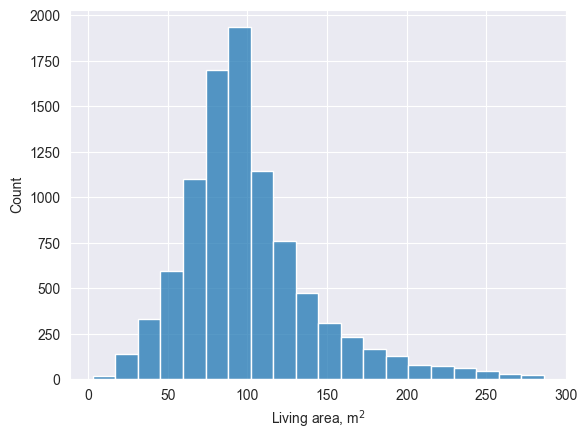

In [296]:
sns.set_style("darkgrid")
sns.histplot(df_apt, x="living_area", bins=20)
plt.xlabel("Living area, m$^2$")




(array([  19.,  136.,  328.,  597., 1103., 1701., 1936., 1143.,  759.,
         476.,  311.,  229.,  164.,  129.,   79.,   72.,   59.,   47.,
          30.,   24.]),
 array([  3.  ,  17.15,  31.3 ,  45.45,  59.6 ,  73.75,  87.9 , 102.05,
        116.2 , 130.35, 144.5 , 158.65, 172.8 , 186.95, 201.1 , 215.25,
        229.4 , 243.55, 257.7 , 271.85, 286.  ]),
 <BarContainer object of 20 artists>)

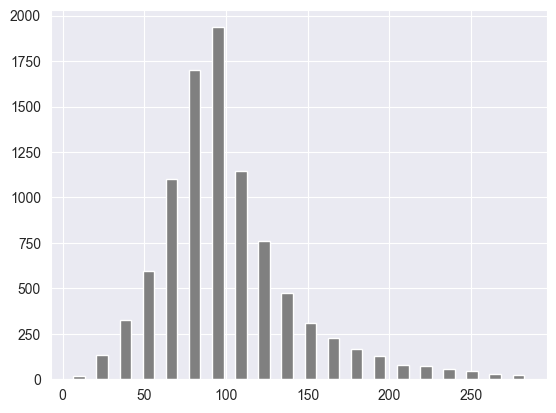

In [297]:
plt.hist(df_apt["living_area"], bins = 20, rwidth=0.5, color="grey")

<Axes: xlabel='living_area'>

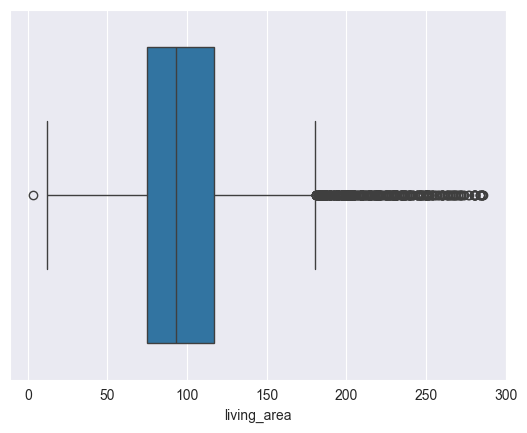

In [298]:
sns.boxplot(data=df_apt, x='living_area')


<Axes: >

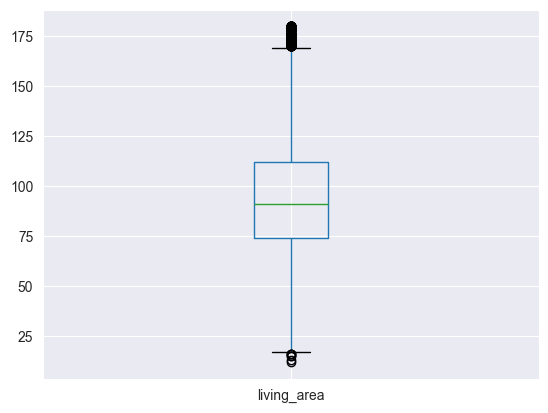

In [299]:
df_filtered_apt.boxplot(column="living_area")

In [330]:
print(df_apt.columns)
df_apt['property_subtype'] = df_apt['property_subtype'].str.lower()
print(df_apt["property_subtype"].unique())
median_price_apt = df_apt.groupby(df_apt['property_subtype'])['price'].median().sort_values()
print(median_price_apt)
median_size_apt = df_apt.groupby(df_apt['property_subtype'])['living_area'].median().sort_values()
print(median_size_apt)







Index(['property_id', 'locality_name', 'postal_code', 'latitude', 'longitude',
       'property_type', 'property_subtype', 'price', 'type_of_sale',
       'number_of_rooms', 'living_area', 'kitchen_type',
       'fully_equipped_kitchen', 'furnished', 'open_fire', 'terrace',
       'terrace_area', 'garden', 'garden_area', 'surface_of_good',
       'number_of_facades', 'swimming_pool', 'state_of_building', 'main_city',
       'province'],
      dtype='object')
['flat_studio' 'apartment' 'duplex' 'ground_floor' 'penthouse'
 'service_flat' 'loft' 'triplex' 'kot']
property_subtype
flat_studio     172500.0
kot             179750.0
service_flat    264000.0
ground_floor    285000.0
apartment       294000.0
duplex          350000.0
triplex         360000.0
loft            507000.0
penthouse       549000.0
Name: price, dtype: float64
property_subtype
kot              23.0
flat_studio      37.0
service_flat     70.0
ground_floor     90.0
apartment        92.0
duplex          125.0
penthouse      

In [ ]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.express as px

In [314]:
px.line(median_price_apt,
       y = "price")

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'property_subtype=%{x}<br>price=%{y}<extra></extra>',
              'legendgroup': '',
              'line': {'color': '#636efa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'scatter',
              'x': array(['flat_studio', 'kot', 'service_flat', 'ground_floor', 'apartment',
                          'duplex', 'triplex', 'loft', 'penthouse'], dtype=object),
              'xaxis': 'x',
              'y': array([172500., 179750., 264000., 285000., 294000., 350000., 360000., 507000.,
                          549000.]),
              'yaxis': 'y'}],
    'layout': {'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'property_subtype'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'price'}}}
})

In [1]:
median_price_apt["living_area"]= df_apt.groupby(df_apt['property_subtype'])['living_area'].median().sort_values()

px.line(median_price_apt["living_area"],
       y = "living_area")

NameError: name 'df_apt' is not defined